In [43]:
import pandas as pd
import numpy as np
import seaborn as sns
import sklearn
import matplotlib.pyplot as plt
import warnings
warnings.filterwarnings("ignore")
from sklearn.preprocessing import LabelEncoder
import pickle

# read the data fronm the csv file

In [44]:
df=pd.read_csv("/Users/ravina/Desktop/Salary Data.csv")
df

,Age,Gender,Education Level,Job Title,Years of Experience,Salary
0,32.0,Male,Bachelor's,Software Engineer,5.0,90000.0
1,28.0,Female,Master's,Data Analyst,3.0,65000.0
2,45.0,Male,PhD,Senior Manager,15.0,150000.0
3,36.0,Female,Bachelor's,Sales Associate,7.0,60000.0
4,52.0,Male,Master's,Director,20.0,200000.0
...,...,...,...,...,...,...
370,35.0,Female,Bachelor's,Senior Marketing Analyst,8.0,85000.0
371,43.0,Male,Master's,Director of Operations,19.0,170000.0
372,29.0,Female,Bachelor's,Junior Project Manager,2.0,40000.0
373,34.0,Male,Bachelor's,Senior Operations Coordinator,7.0,90000.0


In [45]:
df.isna().sum()

Age                    2
Gender                 2
Education Level        2
Job Title              2
Years of Experience    2
Salary                 2
dtype: int64

In [46]:
df.dropna(inplace=True)

In [47]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 373 entries, 0 to 374
Data columns (total 6 columns):
 #   Column               Non-Null Count  Dtype  
---  ------               --------------  -----  
 0   Age                  373 non-null    float64
 1   Gender               373 non-null    object 
 2   Education Level      373 non-null    object 
 3   Job Title            373 non-null    object 
 4   Years of Experience  373 non-null    float64
 5   Salary               373 non-null    float64
dtypes: float64(3), object(3)
memory usage: 20.4+ KB


In [48]:
df.describe()

,Age,Years of Experience,Salary
count,373.000000,373.000000,373.000000
mean,37.431635,10.030831,100577.345845
std,7.069073,6.557007,48240.013482
min,23.000000,0.000000,350.000000
25%,31.000000,4.000000,55000.000000
50%,36.000000,9.000000,95000.000000
75%,44.000000,15.000000,140000.000000
max,53.000000,25.000000,250000.000000


In [49]:
df['Job Title'].unique()

array(['Software Engineer', 'Data Analyst', 'Senior Manager',
       'Sales Associate', 'Director', 'Marketing Analyst',
       'Product Manager', 'Sales Manager', 'Marketing Coordinator',
       'Senior Scientist', 'Software Developer', 'HR Manager',
       'Financial Analyst', 'Project Manager', 'Customer Service Rep',
       'Operations Manager', 'Marketing Manager', 'Senior Engineer',
       'Data Entry Clerk', 'Sales Director', 'Business Analyst',
       'VP of Operations', 'IT Support', 'Recruiter', 'Financial Manager',
       'Social Media Specialist', 'Software Manager', 'Junior Developer',
       'Senior Consultant', 'Product Designer', 'CEO', 'Accountant',
       'Data Scientist', 'Marketing Specialist', 'Technical Writer',
       'HR Generalist', 'Project Engineer', 'Customer Success Rep',
       'Sales Executive', 'UX Designer', 'Operations Director',
       'Network Engineer', 'Administrative Assistant',
       'Strategy Consultant', 'Copywriter', 'Account Manager',
      

In [50]:
df['Job Title'].value_counts()

Director of Marketing              12
Director of Operations             11
Senior Business Analyst            10
Senior Marketing Analyst            9
Senior Marketing Manager            9
                                   ..
Business Development Manager        1
Customer Service Representative     1
IT Manager                          1
Digital Marketing Manager           1
Junior Web Developer                1
Name: Job Title, Length: 174, dtype: int64

In [51]:
#reducing the job titles
job_title_stats=df["Job Title"].value_counts()
job_stats_less_than_20=job_title_stats[job_title_stats<=5]
job_stats_less_than_20.count()

160

In [52]:
df["Job Title"]=df["Job Title"].apply(lambda x: "others" if x in job_stats_less_than_20 else x)
df['Job Title'].nunique()

15

In [53]:
df['Education Level'].unique()

array(["Bachelor's", "Master's", 'PhD'], dtype=object)

In [54]:
df['Gender'].unique()

array(['Male', 'Female'], dtype=object)

In [55]:
df.head()

,Age,Gender,Education Level,Job Title,Years of Experience,Salary
0,32.0,Male,Bachelor's,others,5.0,90000.0
1,28.0,Female,Master's,others,3.0,65000.0
2,45.0,Male,PhD,others,15.0,150000.0
3,36.0,Female,Bachelor's,others,7.0,60000.0
4,52.0,Male,Master's,others,20.0,200000.0


In [56]:
df['Job Title'].unique()

array(['others', 'Director of Marketing', 'Director of Operations',
       'Senior Data Scientist', 'Senior Financial Analyst',
       'Senior Software Engineer', 'Senior Project Manager',
       'Senior Marketing Manager', 'Senior Marketing Analyst',
       'Senior Business Analyst', 'Senior Product Manager',
       'Junior Business Analyst', 'Junior Financial Analyst',
       'Junior Business Development Associate',
       'Junior Marketing Coordinator'], dtype=object)

In [57]:
df.isna().sum()

Age                    0
Gender                 0
Education Level        0
Job Title              0
Years of Experience    0
Salary                 0
dtype: int64

In [58]:
df.dropna(inplace=True)

In [59]:
df

,Age,Gender,Education Level,Job Title,Years of Experience,Salary
0,32.0,Male,Bachelor's,others,5.0,90000.0
1,28.0,Female,Master's,others,3.0,65000.0
2,45.0,Male,PhD,others,15.0,150000.0
3,36.0,Female,Bachelor's,others,7.0,60000.0
4,52.0,Male,Master's,others,20.0,200000.0
...,...,...,...,...,...,...
370,35.0,Female,Bachelor's,Senior Marketing Analyst,8.0,85000.0
371,43.0,Male,Master's,Director of Operations,19.0,170000.0
372,29.0,Female,Bachelor's,others,2.0,40000.0
373,34.0,Male,Bachelor's,others,7.0,90000.0


In [60]:
df['Gender'].unique()

array(['Male', 'Female'], dtype=object)

# Distribution of salary

<Axes: xlabel='Salary', ylabel='Count'>

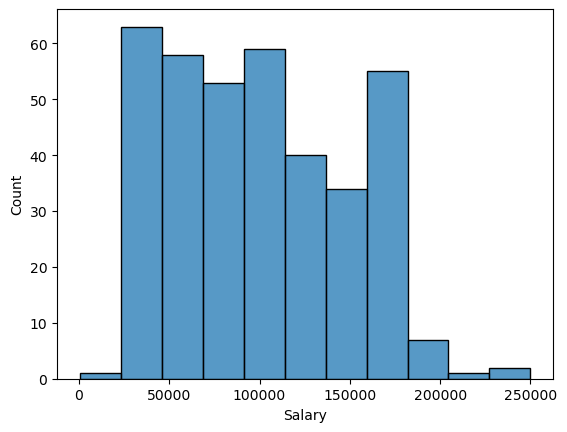

In [61]:
sns.histplot(df['Salary'])


# distribution of categorical data

<Axes: xlabel='Education Level', ylabel='count'>

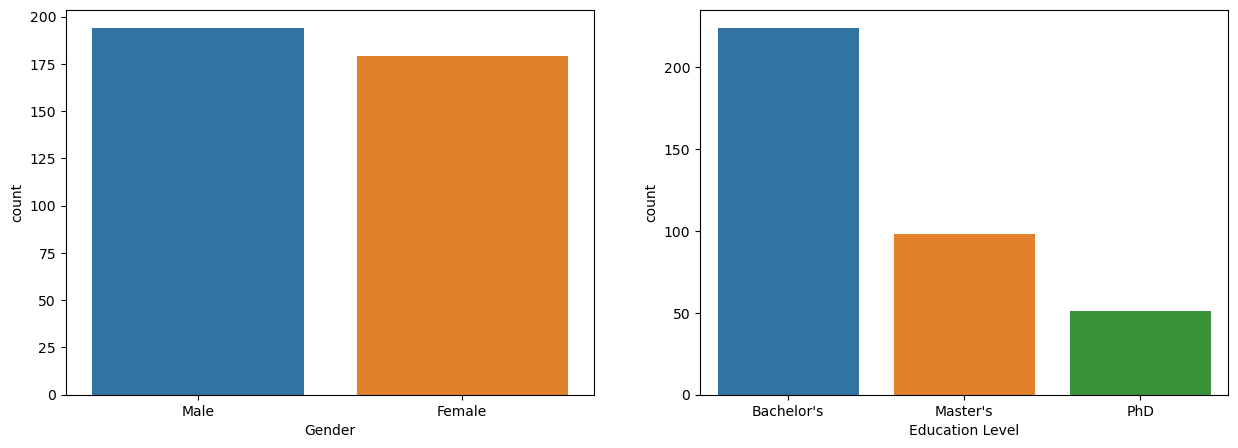

In [62]:
fig,ax=plt.subplots(1,2,figsize=(15,5))
sns.countplot(x='Gender',data=df,ax=ax[0])
sns.countplot(x='Education Level',data=df,ax=ax[1])



# Distribution of continous variables

<Axes: xlabel='Salary', ylabel='Count'>

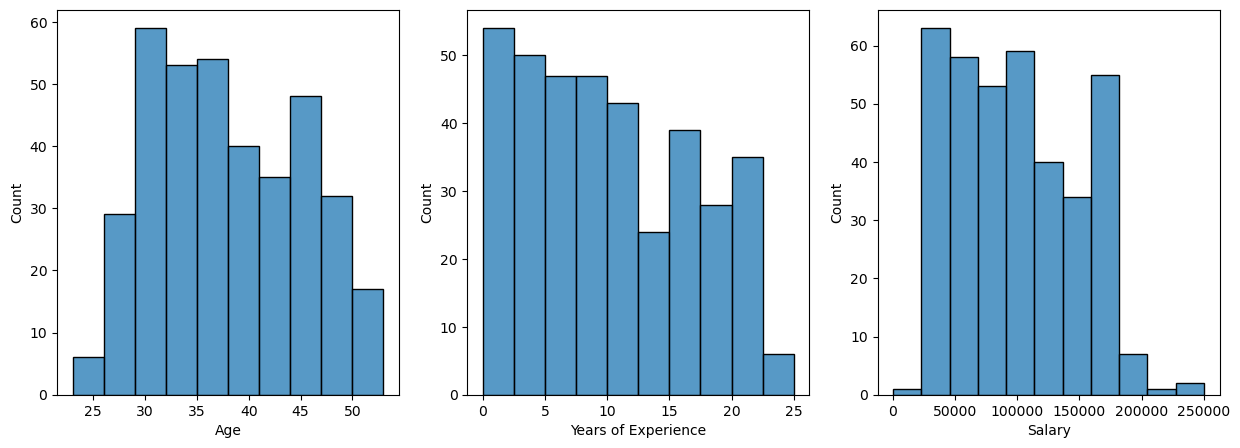

In [63]:
fig,ax=plt.subplots(1,3,figsize=(15,5))
sns.histplot(x='Age',data=df,ax=ax[0])
sns.histplot(x='Years of Experience',data=df,ax=ax[1])
sns.histplot(x='Salary',data=df,ax=ax[2])

# TOp 5 highest paid jobs

[Text(0.5, 1.0, 'rop 5 highest paying jobs')]

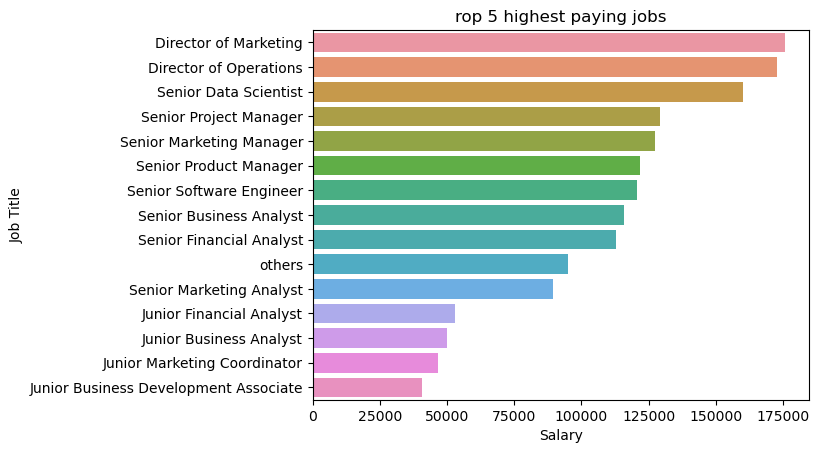

In [64]:
mean_salary=df.groupby('Job Title')['Salary'].mean().reset_index()
sorted_salary=mean_salary.sort_values(by="Salary",ascending=False)
sns.barplot(x="Salary", y="Job Title", data=sorted_salary).set(title="rop 5 highest paying jobs")

# Relationship with target variable

[Text(0.5, 1.0, 'Relationship between education and salary')]

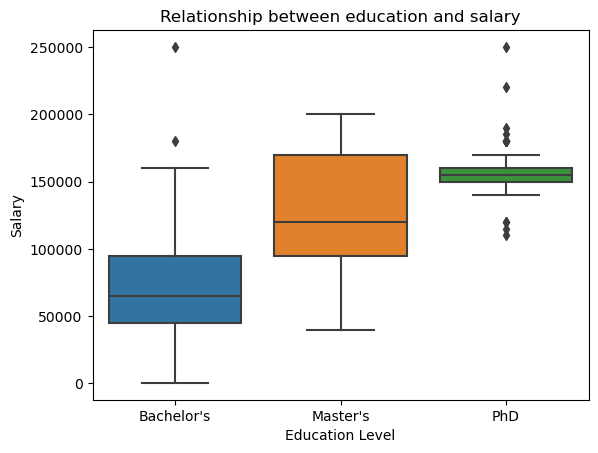

In [65]:
sns.boxplot(x='Education Level' ,y="Salary", data=df).set(title='Relationship between education and salary')

[Text(0.5, 1.0, 'relationship of genderwise education level and salary')]

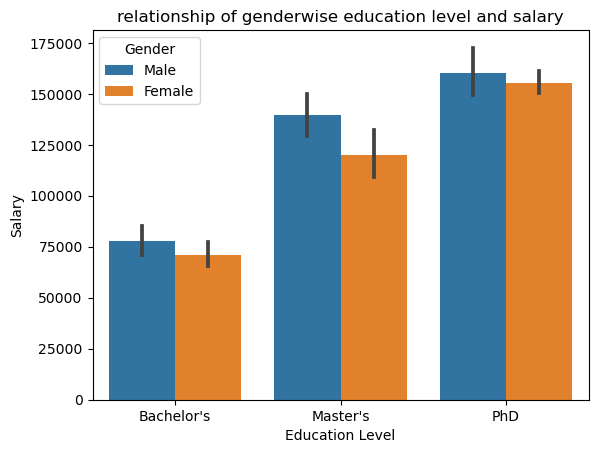

In [66]:
sns.barplot(x='Education Level', y="Salary", hue="Gender", data=df).set(title="relationship of genderwise education level and salary")

# check if data has any outlier

In [67]:
Q1=df["Salary"].quantile(0.25)
Q3=df["Salary"].quantile(0.75)
IQR=Q3-Q1
lb=Q1-1.5*IQR
ub=Q3+1.5*IQR

In [68]:
print(lb,ub)

-72500.0 267500.0


In [69]:
outliers=[x for x in df['Salary'] if x>ub or x<lb]
print(outliers)

[]


above command shows that there are no outliers in the given data

# Preprocess the categorical variables

In [70]:
le= LabelEncoder()
df["Gender"]=le.fit_transform(df['Gender'])
df['Education Level']=le.fit_transform(df["Education Level"])
df['Job Title']=le.fit_transform(df["Job Title"])
df


,Age,Gender,Education Level,Job Title,Years of Experience,Salary
0,32.0,1,0,14,5.0,90000.0
1,28.0,0,1,14,3.0,65000.0
2,45.0,1,2,14,15.0,150000.0
3,36.0,0,0,14,7.0,60000.0
4,52.0,1,1,14,20.0,200000.0
...,...,...,...,...,...,...
370,35.0,0,0,9,8.0,85000.0
371,43.0,1,1,1,19.0,170000.0
372,29.0,0,0,14,2.0,40000.0
373,34.0,1,0,14,7.0,90000.0


In [71]:
pickle.dump(le,open('label_encoder.pkl',"wb"))
le=pickle.load(open('label_encoder.pkl',"rb"))

In [72]:
#dummies=pd.get_dummies(df['Job Title'],drop_first=True)
#df=pd.concat([df,dummies],axis=1)
#df.drop('Job Title',inplace=True,axis=1)
#df.head()

# Train test split 

In [73]:
Y=df["Salary"]
X=df.drop('Salary',axis=1)

In [74]:
from sklearn.model_selection import train_test_split
X_train,X_test,y_train,y_test=train_test_split(X,Y,test_size=0.25, random_state=34)


In [75]:
X_train.shape

(279, 5)

In [76]:
#Salary_prediction
from sklearn.linear_model import LogisticRegression, LinearRegression
from sklearn.tree import DecisionTreeRegressor
from sklearn.ensemble import RandomForestRegressor
from sklearn.ensemble import GradientBoostingRegressor
from sklearn.model_selection import GridSearchCV



In [77]:
models = {
    "Logistic_regression": {"Model": LogisticRegression(), "param": {}},
    "LinearRegression": {"Model": LinearRegression(), "param": {}},
    "Decision_tree": {"Model": DecisionTreeRegressor(), "param": {"max_depth": [2, 4, 6, 8],
                                                                 "random_state": [4, 6, 9],
                                                                 "min_samples_split": [4, 6, 7, 9, 10]}},
    "RandomForestRegressor": {"Model": RandomForestRegressor(), "param": {"n_estimators": [10, 20, 30, 40, 50, 80]}},
    "GradientBoostingRegressor": {"Model": GradientBoostingRegressor(), "param": {"n_estimators": [40, 50, 70, 60, 100],
                                                                                "learning_rate": [0.001, 0.002, 0.003, 0.01],
                                                                                "random_state": [1, 2, 3, 4, 5, 6]}},
}

result = []
for model_name, model_val in models.items():
    model = model_val["Model"]
    gridcv = GridSearchCV(estimator=model, param_grid=model_val["param"], cv=5, scoring='neg_mean_gamma_deviance')
    gridcv.fit(X_train, y_train)
    result.append({"Model": model_name, 
                   "param": gridcv.best_params_, 
                   "MSE": gridcv.best_score_
                   })

print(pd.DataFrame(result))


                       Model  \
0        Logistic_regression   
1           LinearRegression   
2              Decision_tree   
3      RandomForestRegressor   
4  GradientBoostingRegressor   

                                               param       MSE  
0                                                 {} -0.039237  
1                                                 {} -0.027067  
2  {'max_depth': 6, 'min_samples_split': 7, 'rand... -0.027276  
3                               {'n_estimators': 40} -0.023583  
4  {'learning_rate': 0.01, 'n_estimators': 100, '... -0.068590  


Gradient boosting has the highest mean squared error and decision tree has the lowest error.


In [78]:
#model evaluation
r_forest=RandomForestRegressor(n_estimators=40)

In [79]:
#models=[decisio_t,r_forest]
#predicted_values=[]
#for model in models:
    #model.fit(X_train,y_train)
    #prediction=model.predict(X_test)
    #predicted_values.append(prediction)
from sklearn.metrics import mean_squared_error,mean_absolute_error
decisio_t=DecisionTreeRegressor(max_depth=4,min_samples_split=4,random_state=4)

model=decisio_t.fit(X_train,y_train)
y_pred=model.predict(X_test)
print("Mean Squared Error is:",mean_squared_error(y_test,y_pred,squared=False))
print("Mean absolute Error is:", mean_absolute_error(y_test,y_pred))


Mean Squared Error is: 15977.948317082917
Mean absolute Error is: 11562.116170254161


In [80]:
#saving the model
pickle.dump(model,open('model.pkl',"wb"))

Loading the model to compare the files

In [81]:
model=pickle.load(open("model.pkl","rb"))

In [82]:
print(model.predict([[28,1,1,1,5]]))

[53333.33333333]
